In [39]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import random
import numpy as np
from copy import deepcopy

In [31]:
# results1/results_fifo_full/job.csv
# results1/results_gandiva_full/job.csv
# results1/results_shortest_full/job.csv
# results1/results_sjf_full/job.csv
# results2/results_dlas_gpu_gittins_sampled/job.csv

dlas_gpu_sampled_job = []
with open('results2/results_dlas_gpu_sampled/job.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for r in reader:
        dlas_gpu_sampled_job.append(r)

In [14]:
print("Number of jobs run:")
print("fifo_full:\t",len(fifo_full_job))
print("gandiva_full:\t",len(gandiva_full_job))
print("shortest_full:\t",len(shortest_full_job))
print("sjf_full:\t",len(sjf_full_job))

Number of jobs run:
fifo_full:	 64716
gandiva_full:	 24054
shortest_full:	 9485
sjf_full:	 7386


In [34]:
print("Number of jobs run:")
print("fifo_sample:\t\t",len(fifo_sampled_job))
print("gandiva_sample:\t\t",len(gandiva_sampled_job))
print("shortest_sample:\t",len(shortest_sampled_job))
print("sjf_sample:\t\t",len(sjf_sampled_job))
print("dlas_gpu_gittins_sample:", len(dlas_gpu_gittins_sampled_job))
print("dlas_gpu_sample:\t", len(dlas_gpu_sampled_job))

Number of jobs run:
fifo_sample:		 10001
gandiva_sample:		 10001
shortest_sample:	 10001
sjf_sample:		 10001
dlas_gpu_gittins_sample: 10001
dlas_gpu_sample:	 10001


In [74]:
names = ["fifo_sampled", "gandiva_sampled", "shortest_sampled", "sjf_sampled", "dlas_gpu_gittins_sampled", "dlas_gpu_sampled"]


### Graphs from sampled data

#### JCT

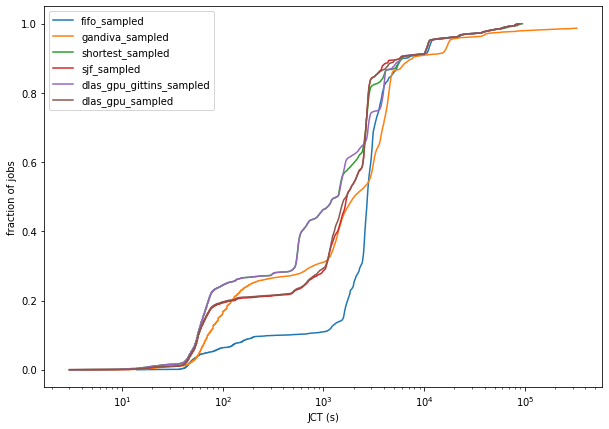

In [111]:
data = [fifo_sampled_job, gandiva_sampled_job, shortest_sampled_job, sjf_sampled_job, dlas_gpu_gittins_sampled_job, dlas_gpu_sampled_job]
jct = [[], [], [], [], [], []]
for i, dataset in enumerate(data):
    for rec in dataset:
        jct[i].append(int(rec['JCT']))
    
yaxis = list(map(lambda x: x / len(fifo_sampled_job), list(range(len(fifo_sampled_job)))))

plt.figure(figsize=(10, 7))
plt.plot(sorted(jct[0]), yaxis)
plt.plot(sorted(jct[1])[:9875], yaxis[:9875])
plt.plot(sorted(jct[2]), yaxis)
plt.plot(sorted(jct[3]), yaxis)
plt.plot(sorted(jct[4]), yaxis)
plt.plot(sorted(jct[5]), yaxis)
# plt.legend(names[:1]+names[2:])
plt.legend(names)
plt.ylabel("fraction of jobs")
plt.xlabel("JCT (s)")
plt.xscale("log")

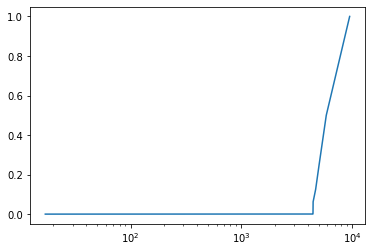

In [108]:
freq_jct = [[] for c in data]
# for i, dataset in data:
xax = []    

for c in sorted(int(rec['JCT']) for rec in data[0][:5000]):
    freq_jct[0].append(sum(freq_jct[0]) + 1)
    xax.append(c)

plt.plot(xax, list(map(lambda x: x / freq_jct[0][-1], freq_jct[0])))
plt.xscale("log")
# plt.plot(xax)

In [73]:
# average JCTs
avg_jct = []
for dataset in data:
    avg_jct.append(sum(int(rec['JCT']) for rec in dataset) / len(dataset))
    
for n, v in zip(names, avg_jct):
    print(n + ": " + str(v))

fifo_sampled: 4822.813318668133
gandiva_sampled: 12146.911408859114
shortest_sampled: 3857.4188581141884
sjf_sampled: 3936.838216178382
dlas_gpu_gittins_sampled: 3867.927107289271
dlas_gpu_sampled: 3952.8799120087992


In [114]:
# reading cluster data
# results1/results_fifo_full/job.csv
# results1/results_gandiva_full/job.csv
# results1/results_shortest_full/job.csv
# results1/results_sjf_full/job.csv
# results2/results_dlas_gpu_gittins_sampled/job.csv
# results2/results_dlas_gpu_sampled/job.csv
file_paths = ["results1/results_fifo_full/cluster.csv", "results1/results_gandiva_full/cluster.csv", "results1/results_shortest_full/cluster.csv", "results1/results_sjf_full/cluster.csv", "results2/results_dlas_gpu_gittins_sampled/cluster.csv", "results2/results_dlas_gpu_sampled/cluster.csv"]
cluster_data = []
for i, path in enumerate(file_paths):
    cluster_data.append([])
    with open(path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for r in reader:
            cluster_data[i].append(r)

#### GPU Util

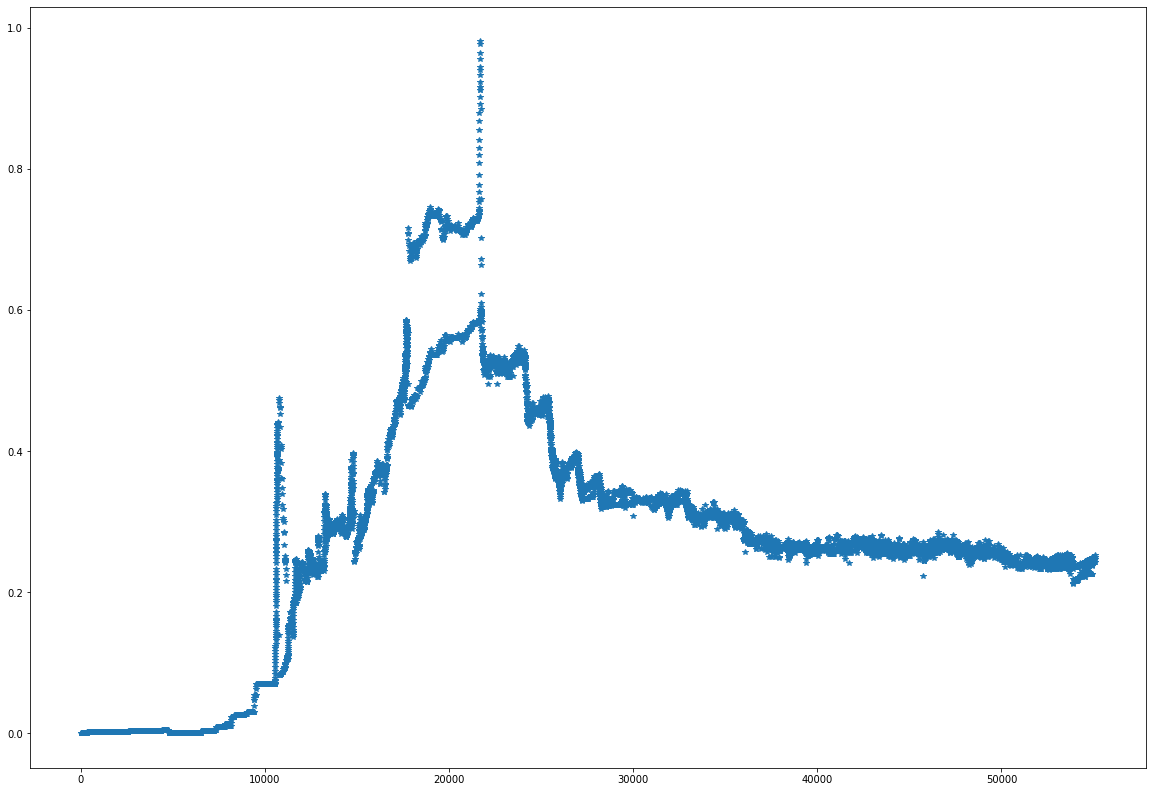

In [165]:
gpu_util = [[], [], [], [], [], []]
time = [[] for i in cluster_data]

temp = []
for i, dataset in enumerate(cluster_data):
    test = []
    for rec in dataset:
        t1 = 0
        if i == 1:
            gpu_util[i].append(int(rec['busy_gpu']) / (2048))
            t1 = gpu_util[i][-1]
        else:
            gpu_util[i].append(int(rec['busy_gpu']) / (int(rec['idle_gpu']) + int(rec['busy_gpu'])))
            t1 = gpu_util[i][-1]

        time[i].append(int(rec['time']))
        test.append([t1, time[i][-1]])
    test.sort(key=lambda x:x[1])
    t1 = []
    t2 = []
    for t in test:
        t1.append(t[0])
        t2.append(t[1])
    temp.append([t1, t2])
        
#     for j in range(len(time[i])):
#         time[i][j] /= time[i][-1]
#         print(time[i][j])
    
# yaxis = list(map(lambda x: x / len(cluster_data[0]), list(range(len(cluster_data[0])))))

gpu_util[0]
plt.figure(figsize=(20, 14))
plt.plot(temp[1][1], temp[1][0], '*')
# plt.plot(np.cumsum(gpu_util[0]), time[0])
# plt.plot(sorted(gpu_util[1]), time[1])
# plt.plot(sorted(gpu_util[2]), time[2])
# plt.plot(sorted(gpu_util[3]), time[3])
# plt.plot(sorted(gpu_util[4]), time[4])
# plt.plot(sorted(gpu_util[5]), time[5])
# # plt.legend(names[:1]+names[2:])
# plt.legend(names)
# plt.ylabel("fraction of jobs")
# plt.xlabel("GPU Util (s)")
# plt.xscale("log")

In [143]:
full_input_data = []

with open('../../GPU_scheduling_algorithms/filtered_traces/full_clean_data.csv', newline='') as csvfile2:
    reader2 = csv.DictReader(csvfile2)
    for r in reader2:
        full_input_data.append(r)

In [133]:
input_data[0].keys()

dict_keys(['num_gpu', 'job_id', 'duration', 'submit_time', 'interval', 'model_name'])

In [144]:
full_gpus = []
full_dur = []
for rec in full_input_data:
    full_gpus.append(int(rec['num_gpu']))
    full_dur.append(int(rec['duration']))

Counter({1: 72760,
         4: 1494,
         8: 1265,
         16: 144,
         2: 1735,
         32: 52,
         12: 4,
         24: 4,
         64: 5})

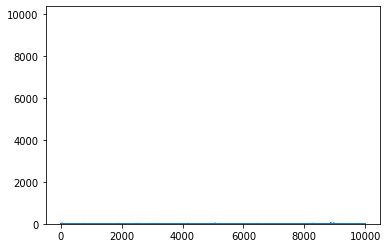

In [145]:
plt.plot(gpus)
# plt.figure()
# plt.plot(dur)
# print(np.median(gpus))
# print(np.median(dur))
plt.hist(gpus)
from collections import Counter
fgpuc = Counter(full_gpus)
fgpuc